In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense , Input
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

print("Version of tensorflow is : ",tf.__version__)

In [4]:
data_details = load_boston()
print("Keys of data_details : ",data_details.keys())

Keys of data_details :  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
data = data_details.data
print("Data shape : ",data.shape)
target = data_details.target
print("Target shape : ",target.shape)

Data shape :  (506, 13)
Target shape :  (506,)


In [8]:
mean = data.mean(axis=0)
data = data - mean
std = data.std(axis=0)
data = data / std

In [10]:
mean_y = target.mean()
target = target - mean_y
std_y  = target.std()
target = target / std_y

In [22]:
def get_base_model(input_shape):
    input = Input(shape = input_shape)
    l1    = Dense(1)(input)
    model = Model(inputs = input , outputs = l1)
    model.compile(optimizer="rmsprop" , loss=tf.keras.losses.mean_squared_error)
    return model

MEAN LOSS     :  0.26434347331523894
MEAN VAL LOSS :  0.3712477803230286


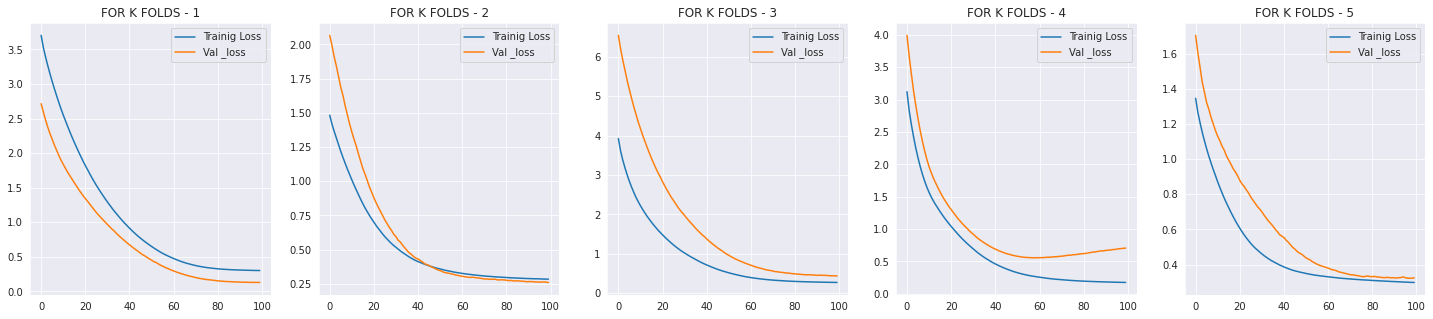

In [37]:
Batch_size = 100
epochs     = 100
no_batch = data.shape[0] // Batch_size
loss = []
val_loss = []
fig , ax = plt.subplots(1,no_batch,figsize=(25,5))

for i in range(no_batch):
    target_x = data[i*Batch_size : (i+1) * Batch_size]
    target_y = target[i*Batch_size : (i+1) * Batch_size]

    train_x  = np.concatenate((data[:i*Batch_size] , data[(i+1) * Batch_size :]))
    train_y  = np.concatenate((target[:i*Batch_size] , target[(i+1) * Batch_size :]))

    model = get_base_model(input_shape=train_x.shape[1])
    his = model.fit(train_x,train_y ,
                    epochs = epochs ,
                    validation_data=(target_x,target_y),
                    verbose=0)
    
    loss.append(model.evaluate(train_x,train_y ,verbose=0))
    val_loss.append(model.evaluate(target_x,target_y , verbose=0))

    ax[i].plot(his.history['loss'] , label="Trainig Loss")
    ax[i].plot(his.history['val_loss'] , label="Val _loss")
    ax[i].legend()
    ax[i].set_title("FOR K FOLDS - %d"%(i+1))

print("MEAN LOSS     : ",sum(loss) / len(loss))
print("MEAN VAL LOSS : ",sum(val_loss) / len(val_loss))